### Install libraries

In [0]:
!pip install transformers -q

In [0]:
import re
import math
import torch
from transformers import BartConfig
from pre_training import TrainerMLM

import warnings
warnings.filterwarnings('ignore')

### Get modules

In [0]:
!git clone https://github.com/IgnatovD/ruBart/ -q

In [8]:
cd ruBart/modules

/content/ruBart


### Download a part of the ruWiki dataset

In [0]:
!mkdir -p data
!wget https://www.dropbox.com/s/cc7lpkuy3mqk0hp/ruwiki_txt_1.tar.gz?dl=0 -O data/ruWiki.tar.gz -q

In [0]:
!tar -xf 'data/ruWiki.tar.gz'

In [0]:
with open(f'data/listsen1.txt', 'r') as file:
    l = file.readlines()
    l = [line.lower() for line in l]
    data = [re.sub(r'\n', '', line) for line in l]

### Initialize the model

In [0]:
#@title Set model configuration { vertical-output: true, display-mode: "form" }

ffn_dim = 1024 #@param
hidden_dim = 256 #@param
num_layers = 4 #@param
attention_heads = 16 #@param

config = BartConfig()
config.d_model = hidden_dim
config.decoder_attention_heads = attention_heads
config.decoder_ffn_dim = ffn_dim
config.decoder_layers = num_layers
config.encoder_attention_heads = attention_heads
config.encoder_ffn_dim = ffn_dim
config.encoder_layers = num_layers
config.num_hidden_layers = num_layers
config.pad_token_id = 1
config.vocab_size = 30000

In [0]:
#@title Set parameters { vertical-output: true, display-mode: "form" }

lr = 1e-4 #@param
weight_decay = 0.01 #@param
batch_size =  32#@param
path_save = 'model/pretrained/' #@param

total_steps = math.ceil(19621082 / batch_size) # 19621082 - all sentences in data 

args = {
        'batch_size': batch_size,
        'device': torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'),
        'lr': lr,
        'weight_decay': weight_decay,
        'total_steps': total_steps,
        'warmup_steps': math.ceil(total_steps / 100),
        'vocab_size': 30000,
        'path_save': path_save,
        }

In [0]:
trainer = TrainerMLM(config, **args)

In [0]:
model, optimizer, scheduler, history, learning_rate, best_loss = trainer.load()

### Train

In [34]:
model, history, learning_rate, best_loss = trainer.train(data[:10000], model, optimizer, scheduler, history, learning_rate, best_loss)

### Training visualization

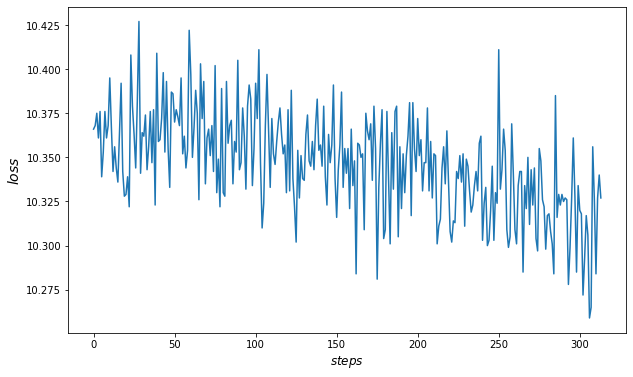

In [35]:
trainer.visualization(history, mode='loss')

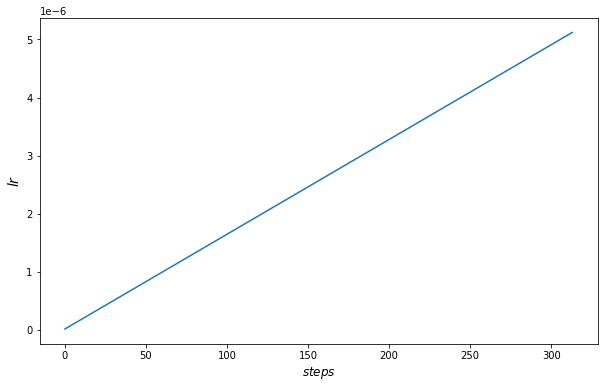

In [36]:
trainer.visualization(learning_rate, mode='lr')